<a href="https://colab.research.google.com/github/dduyeon/ITB_Mining/blob/main/ITB%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C_1912264_%EB%82%A8%EC%88%98%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류개요
요단백은 비교적 간단한 검사인 소변검사를 통해 발견할 수 있다.
요단백은 신장기능 이상이나 당뇨병으로 인해 발생할 수가 있다.

따라서 요단백을 기초로 하여 신장기능 이상, 당뇨병을 의심하고 재검사, 정밀검사 여부를 판단할 수 있도록 하는 것이 이번 분류의 주목적이다. 

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [5]:
plt.rc('font', family='NanumBarunGothic') 

분류에 필요한 새로운 변수를 excel 작업을 통해 먼저 생성(변수 추가된 파일을 
불러옴)

추가된 변수:

- 요단백_세부분류: 1-음성(0)/ 2,3-경계(1)/ 4,5,6-추가검사필요(2)

- 식전혈당_이상치: 식전혈당 정상치가 정상 성인이 100mg/dL, 60세 이상 성인은 110mg/dL. 따라서 110mg/dL을 초과하는 수치를 이상치로 판정(0:정상치/1:이상치) -> **당뇨병의심**

- 혈청크레아티닌_이상치: 혈청크레아티닌 농도는 신기능장애에 의해 증량한다. 정상치가 0.8~1.7mg/dL이므로 1.7mg/dL을 초과하는 수치는 이상치로 판정(0:정상치/1:이상치) -> **신장기능이상 의심**

- 신장기능정밀검사필요: 요단백에서 추가검사 필요 판정, 혈청크레아티닌 이상치 측정된 경우 신장기능 관련 정밀검사 필요.

- 당뇨병정밀검사필요: 요단백에서 추가검사 필요 판정, 식전혈당 이상치 측정된 경우 당뇨병 관련 정밀검사 필요.


**타겟변수: 신장기능, 당뇨병 정밀검사 필요 여부 (2개의 class:"Y","N")**

- 그 외에 필요한 변수들: 식전공복혈당, 혈청크레아티닌, 음주여부, 신장,체중,수축기혈압, 이완기혈압



In [6]:
health = pd.read_csv('/content/drive/MyDrive/ITB/health_data_변수추가.csv', encoding = 'utf-8')

# 신장기능 관련 정밀검사 필요 판정

In [7]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  식전혈당_이상치     10000 non-null  int64  
 16  총콜레스테롤       4044 non-null   float64
 17  트리글리세라이드     4044 non-null   float64
 18  HDL콜레스테롤     4044 non-null   float64
 19  LDL콜레

In [16]:
health_kn = health[['신장(5Cm단위)','체중(5Kg 단위)','수축기혈압','이완기혈압','식전혈당(공복혈당)','식전혈당_이상치','요단백','요단백_세부분류','혈청크레아티닌','혈청크레아티닌_이상치','신장기능정밀검사필요']]

In [17]:
health_kn.info()
health_kn.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   신장(5Cm단위)    10000 non-null  int64  
 1   체중(5Kg 단위)   10000 non-null  int64  
 2   수축기혈압        9912 non-null   float64
 3   이완기혈압        9912 non-null   float64
 4   식전혈당(공복혈당)   9912 non-null   float64
 5   식전혈당_이상치     10000 non-null  int64  
 6   요단백          9861 non-null   float64
 7   요단백_세부분류     10000 non-null  int64  
 8   혈청크레아티닌      9912 non-null   float64
 9   혈청크레아티닌_이상치  10000 non-null  int64  
 10  신장기능정밀검사필요   10000 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 859.5+ KB


,신장(5Cm단위),체중(5Kg 단위),수축기혈압,이완기혈압,식전혈당(공복혈당),식전혈당_이상치,요단백,요단백_세부분류,혈청크레아티닌,혈청크레아티닌_이상치,신장기능정밀검사필요
0,165,60,127.0,79.0,90.0,0,1.0,0,1.1,0,N
1,150,65,110.0,73.0,87.0,0,1.0,0,0.5,0,N
2,155,55,123.0,80.0,102.0,0,1.0,0,0.7,0,N
3,160,70,134.0,84.0,146.0,1,1.0,0,1.2,0,N
4,155,50,144.0,89.0,110.0,0,1.0,0,0.7,0,N


In [18]:
# 결측치 있는 행 제거
health_kn = health_kn.dropna(axis = 0)
health_kn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9861 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   신장(5Cm단위)    9861 non-null   int64  
 1   체중(5Kg 단위)   9861 non-null   int64  
 2   수축기혈압        9861 non-null   float64
 3   이완기혈압        9861 non-null   float64
 4   식전혈당(공복혈당)   9861 non-null   float64
 5   식전혈당_이상치     9861 non-null   int64  
 6   요단백          9861 non-null   float64
 7   요단백_세부분류     9861 non-null   int64  
 8   혈청크레아티닌      9861 non-null   float64
 9   혈청크레아티닌_이상치  9861 non-null   int64  
 10  신장기능정밀검사필요   9861 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 924.5+ KB


In [19]:
import matplotlib as mpl
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


N    9849
Y      12
Name: 신장기능정밀검사필요, dtype: int64


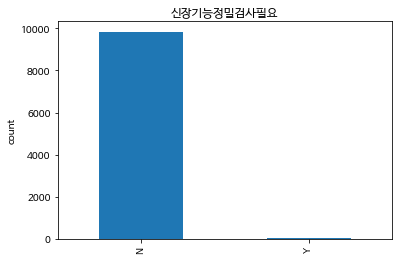

In [20]:
print(health_kn['신장기능정밀검사필요'].value_counts())

health_kn['신장기능정밀검사필요'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('신장기능정밀검사필요')
plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health_kn[['신장(5Cm단위)','체중(5Kg 단위)','수축기혈압','이완기혈압','식전혈당(공복혈당)','식전혈당_이상치','요단백','요단백_세부분류','혈청크레아티닌','혈청크레아티닌_이상치']]
y = health_kn[['신장기능정밀검사필요']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.999


In [22]:
from sklearn.tree import export_graphviz
import graphviz

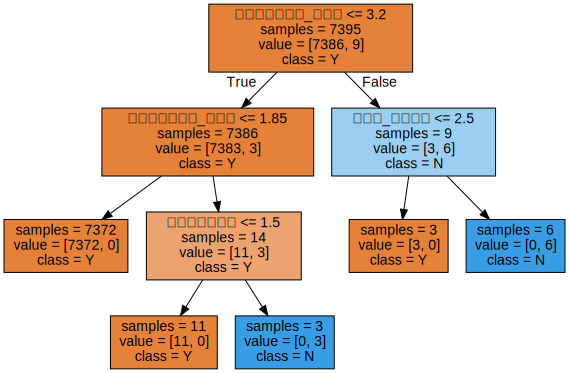

In [23]:
export_graphviz(tree, out_file="tree.dot", class_names=[ "Y", "N"],
                feature_names=health_kn.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [24]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.        0.        0.        0.        0.        0.        0.222493
 0.2622239 0.5152831 0.       ]


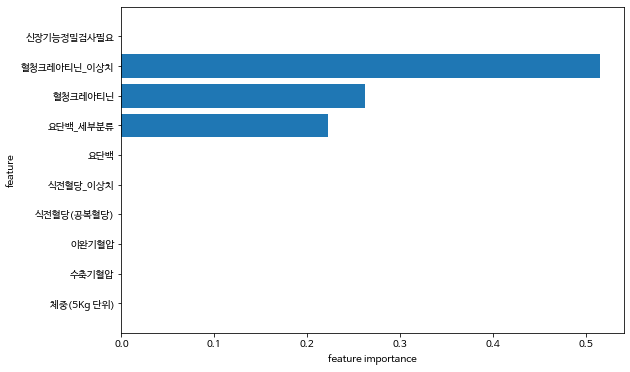

In [25]:
import numpy as np

def plot_feature_importances_health_kn(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health_kn.columns[1:])  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health_kn.columns[1:])  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) 

plot_feature_importances_health_kn(tree)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')  
print("Accuracy")
print("Decision tree: ", dt_scores) 

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Accuracy
Decision tree:  [1. 1. 1. 1. 1.]


# 당뇨병 관련 정밀검사 필요 판정

In [26]:
health_sd = health[['신장(5Cm단위)','체중(5Kg 단위)','수축기혈압','이완기혈압','식전혈당(공복혈당)','식전혈당_이상치','요단백','요단백_세부분류','혈청크레아티닌','혈청크레아티닌_이상치','당뇨병정밀검사필요']]

In [27]:
health_sd.info()
health_sd.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   신장(5Cm단위)    10000 non-null  int64  
 1   체중(5Kg 단위)   10000 non-null  int64  
 2   수축기혈압        9912 non-null   float64
 3   이완기혈압        9912 non-null   float64
 4   식전혈당(공복혈당)   9912 non-null   float64
 5   식전혈당_이상치     10000 non-null  int64  
 6   요단백          9861 non-null   float64
 7   요단백_세부분류     10000 non-null  int64  
 8   혈청크레아티닌      9912 non-null   float64
 9   혈청크레아티닌_이상치  10000 non-null  int64  
 10  당뇨병정밀검사필요    10000 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 859.5+ KB


,신장(5Cm단위),체중(5Kg 단위),수축기혈압,이완기혈압,식전혈당(공복혈당),식전혈당_이상치,요단백,요단백_세부분류,혈청크레아티닌,혈청크레아티닌_이상치,당뇨병정밀검사필요
0,165,60,127.0,79.0,90.0,0,1.0,0,1.1,0,N
1,150,65,110.0,73.0,87.0,0,1.0,0,0.5,0,N
2,155,55,123.0,80.0,102.0,0,1.0,0,0.7,0,N
3,160,70,134.0,84.0,146.0,1,1.0,0,1.2,0,N
4,155,50,144.0,89.0,110.0,0,1.0,0,0.7,0,N


In [28]:
# 결측치 있는 행 제거
health_sd = health_sd.dropna(axis = 0)
health_sd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9861 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   신장(5Cm단위)    9861 non-null   int64  
 1   체중(5Kg 단위)   9861 non-null   int64  
 2   수축기혈압        9861 non-null   float64
 3   이완기혈압        9861 non-null   float64
 4   식전혈당(공복혈당)   9861 non-null   float64
 5   식전혈당_이상치     9861 non-null   int64  
 6   요단백          9861 non-null   float64
 7   요단백_세부분류     9861 non-null   int64  
 8   혈청크레아티닌      9861 non-null   float64
 9   혈청크레아티닌_이상치  9861 non-null   int64  
 10  당뇨병정밀검사필요    9861 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 924.5+ KB


N    9799
Y      62
Name: 당뇨병정밀검사필요, dtype: int64


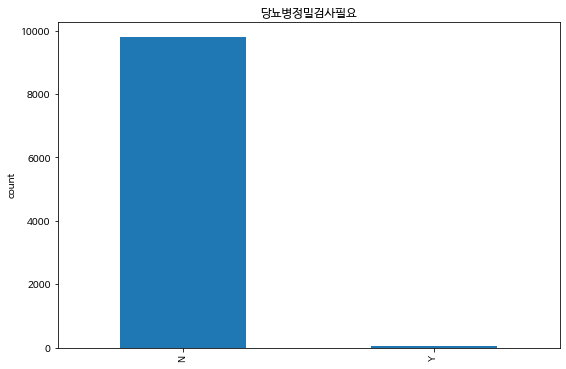

In [29]:
print(health_sd['당뇨병정밀검사필요'].value_counts())

health_sd['당뇨병정밀검사필요'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('당뇨병정밀검사필요')
plt.show()

In [32]:
X = health_sd[['신장(5Cm단위)','체중(5Kg 단위)','수축기혈압','이완기혈압','식전혈당(공복혈당)','식전혈당_이상치','요단백','요단백_세부분류','혈청크레아티닌','혈청크레아티닌_이상치']]
y = health_sd[['당뇨병정밀검사필요']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 1.000


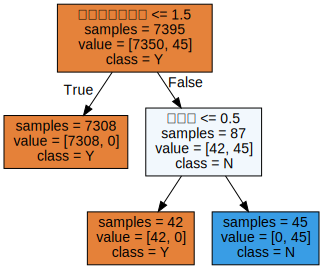

In [33]:
export_graphviz(tree, out_file="tree.dot", class_names=[ "Y", "N"],
                feature_names=health_sd.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [34]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.         0.         0.         0.         0.48571429
 0.         0.51428571 0.         0.        ]


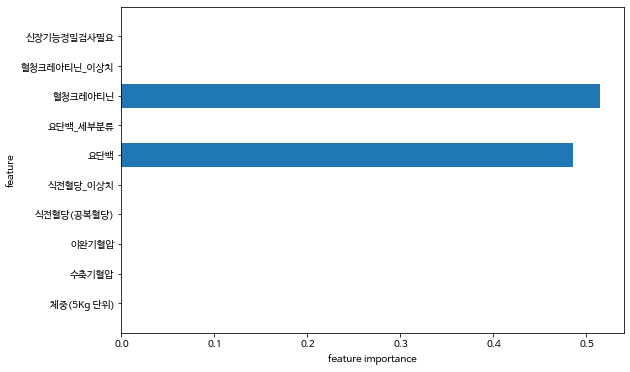

In [35]:
def plot_feature_importances_health_sd(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health_sd.columns[1:])  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health_sd.columns[1:])  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) 

plot_feature_importances_health_kn(tree)